In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/testdata/Test.xlsx
/kaggle/input/train/Train.xlsx


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

df = pd.read_excel('/kaggle/input/train/Train.xlsx',index_col=0)
y = df['CLASS'].values
x = df.drop(['CLASS'],axis=1).values
x = np.nan_to_num(x)
sm = SMOTE(random_state=1)
X_res , Y_res = sm.fit_resample(x, y)
X_train, X_test, y_train, y_test = train_test_split(X_res,Y_res,test_size=0.2,random_state=0)

# fs = SelectKBest(chi2, k=70)
# fs.fit(X_train, y_train)
# X_test = fs.transform(X_test)
# X_train = fs.transform(X_train)

# from sklearn.decomposition import PCA
# fr = PCA(n_components=30)
# fr.fit(X_train)
# X_train = fr.transform(X_train)
# X_test = fr.transform(X_test)



scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

#upload data test
df_test = pd.read_excel('/kaggle/input/testdata/Test.xlsx',index_col=0)
y_test_data = df_test['CLASS'].values  
x_test_data = df_test.drop(['CLASS'],axis=1).values
x_test_data = np.nan_to_num(x_test_data)
# X_train2, X_test2, y_train2, y_test2 = train_test_split(x_test_data,y_test_data,test_size=0.2,random_state=0)
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaler.fit(X_train2)
# X_train_norm2 = scaler.transform(X_train2)
# X_test_norm2 = scaler.transform(x_test_data)

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
params = {
    'C' : [1,2,4,8,16,32], # High C = Overfitting
    'gamma' : [0.03125, 0.0600, 0.125, 0.25, 0.5, 1, 2, 4, 8, 15, 32] # High gamma = Overfitting
}
clf = GridSearchCV(SVC(),params, cv=10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

Best params : {'C': 8, 'gamma': 0.06}
10CV accuracy : 93.13446969696969


In [4]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
sum(y_test == y_predict)/len(y_test)

0.9506172839506173

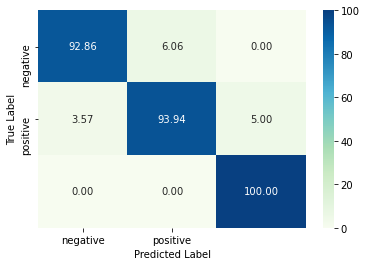

In [5]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [6]:
# y_predict = clf.predict(X_test_norm)
# #sum(y_test == y_predict)/len(y_test)
# print("Test accuracy : "+str(sum(y_test_data == y_predict)/len(y_test_data)*100))


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: 'bool' object is not iterable

In [ ]:
#upload data test
df_test = pd.read_excel('/kaggle/input/testdata/Test.xlsx',index_col=0)
y_test_data = df_test['CLASS'].values  
x_test_data = df_test.drop(['CLASS'],axis=1).values
x_test_data = np.nan_to_num(x_test_data)
x_test_data = scaler.transform(x_test_data)

In [ ]:
y_predict = clf.predict(x_test_data)

In [ ]:
len(y_predict)

In [ ]:
print("Test accuracy : "+str(sum(y_test_data == y_predict)/len(y_test_data)*100))